# 12. Continuous Latent Variables

In [1]:
import os
import sys
from pathlib import Path
sys.path.append(os.path.join(Path().resolve(), '..'))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

from prml.dimreduction import Autoencoder, BayesianPCA, PCA

plt.rcParams["figure.dpi"] = 72.0

np.random.seed(1234)

In [3]:
iris = datasets.load_iris()

## 12.1 Principal Component Analysis

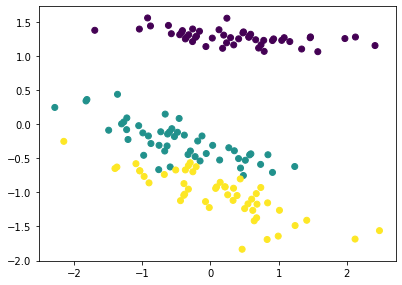

In [4]:
pca = PCA(n_components=2)
Z = pca.fit_transform(iris.data)
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 12.1.4 PCA for high-dimensional data

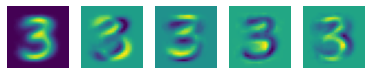

In [10]:
x, y = datasets.fetch_openml("mnist_784", return_X_y=True, as_frame=False, parser='auto')
mnist3 = x[np.random.choice(np.where(y == '3')[0], 200)]
pca = PCA(n_components=4)
pca.fit(mnist3)
plt.subplot(1, 5, 1)
plt.imshow(pca.mean.reshape(28, 28))
plt.axis('off')
for i, w in enumerate(pca.W.T[::-1]):
    plt.subplot(1, 5, i + 2)
    plt.imshow(w.reshape(28, 28))
    plt.axis('off')
plt.show()

### 12.2.2 EM algorithm for PCA

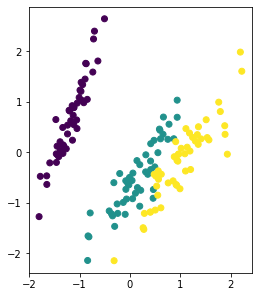

In [6]:
pca = PCA(n_components=2)
Z = pca.fit_transform(iris.data, method="em")
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### 12.2.3 Bayesian PCA

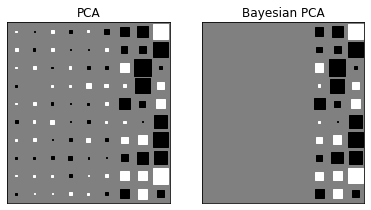

In [7]:
def create_toy_data(sample_size=100, ndim_hidden=1, ndim_observe=2, std=1.):
    Z = np.random.normal(size=(sample_size, ndim_hidden))
    mu = np.random.uniform(-5, 5, size=(ndim_observe))
    W = np.random.uniform(-5, 5, (ndim_hidden, ndim_observe))

    X = Z.dot(W) + mu + np.random.normal(scale=std, size=(sample_size, ndim_observe))
    return X

def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** np.ceil(np.log(np.abs(matrix).max()) / np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = np.sqrt(np.abs(w) / max_weight)
        rect = plt.Rectangle([y - size / 2, x - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()
    plt.xlim(-0.5, np.size(matrix, 1) - 0.5)
    plt.ylim(-0.5, len(matrix) - 0.5)

X = create_toy_data(sample_size=100, ndim_hidden=3, ndim_observe=10, std=1.)
pca = PCA(n_components=9)
pca.fit(X)
bpca = BayesianPCA(n_components=9)
bpca.fit(X, initial="eigen")
plt.subplot(1, 2, 1)
plt.title("PCA")
hinton(pca.W)
plt.subplot(1, 2, 2)
plt.title("Bayesian PCA")
hinton(bpca.W)

### 12.4.2 Autoassociative neural networks

In [8]:
autoencoder = Autoencoder(4, 3, 2)
autoencoder.fit(iris.data, 10000, 1e-3)

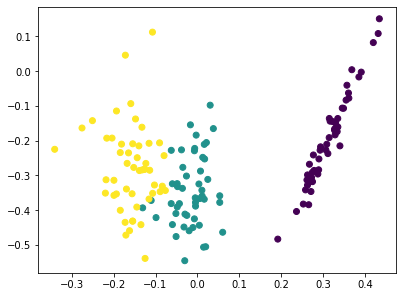

In [9]:
Z = autoencoder.transform(iris.data)
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.show()